## Linear supervised regression
<hr>

## 0. Import library
<hr>
Import library

In [4]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LinearRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time


## 1. Load dataset
<hr>
Load a set of data pairs $\{ x_i, y_i \}_{i=1}^n$ where $x$ represents label and $y$ represents target.

In [5]:
# import data with numpy
data = np.loadtxt('profit_population.txt', delimiter=',')


## 2. Explore the dataset distribution
<hr>

Plot the training data points.

[]

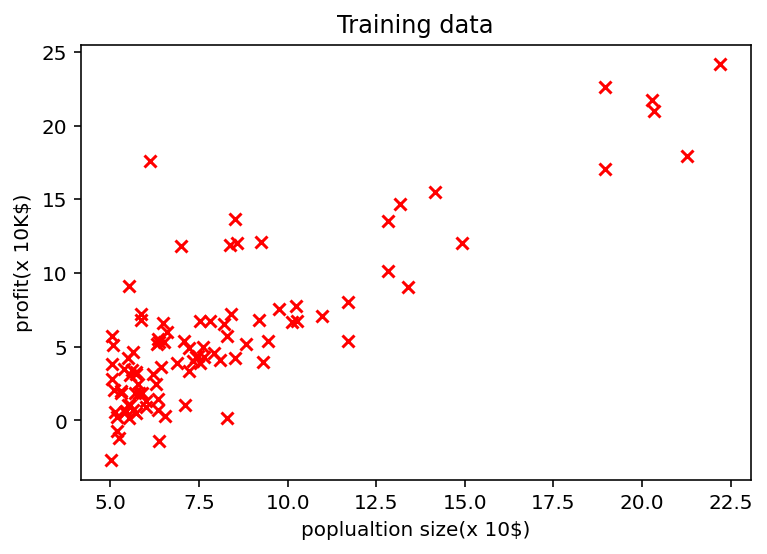

In [6]:
x_train = data[:,0]
y_train = data[:,1]

plt.scatter(x_train,y_train,c="r",marker="x")
plt.xlabel("poplualtion size(x 10$)")
plt.ylabel("profit(x 10K$)")
plt.title("Training data")
plt.plot()

## 3. Define the linear prediction function 
<hr>
$$
f_w(x) = w_0 + w_1 x
$$

### Vectorized implementation:
$$
f_w(x) = X w 
$$
with 
<br>
$$
X = 
\left[ 
\begin{array}{cccc}
1 & x_1 \\ 
1 & x_2 \\ 
\vdots\\
1 & x_n
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 
\end{array} 
\right]
\quad
\Rightarrow 
\quad
f_w(x) = X w  =
\left[ 
\begin{array}{cccc}
w_0 + w_1 x_1 \\ 
w_0 + w_1 x_2 \\ 
\vdots\\
w_0 + w_1 x_n
\end{array} 
\right]
$$

Implement the vectorized version of the linear predictive function.

In [7]:
# construct data matrix
X =np.array(x_train).reshape(-1,1)
X = np.concatenate((np.ones(X.shape),X),axis=1)
# parameters vector
w = np.array([[1],[1]])

# predictive function definition
def f_pred(X,w): 
    
    f = np.matmul(X,w)
    
    return f 

# Test predicitive function 
y_pred = f_pred(X,w)
y_pred.shape

(97, 1)

## 4. Define the linear regression loss 
<hr>
$$
L(w)=\frac{1}{n} \sum_{i=1}^n \ \Big( f_w(x_i) – y_i \Big)^2
$$

### Vectorized implementation:
$$
L(w)=\frac{1}{n} (Xw-y)^T(Xw-y)
$$
with 
$$
Xw=
\left[ 
\begin{array}{cccc}
w_0 + w_1 x_1 \\ 
w_0 + w_1 x_2 \\ 
\vdots\\
w_0 + w_1 x_n
\end{array} 
\right]
\quad
\textrm{ and }
\quad
y = 
\left[ 
\begin{array}{cccc}
y_1 \\ 
y_2 \\ 
\vdots\\
y_n
\end{array} 
\right]
$$

Implement the vectorized version of the linear regression loss function.

In [8]:
# loss function definition
def loss_mse(y_pred,y): 
    temp=y_pred-y
    loss = np.matmul(temp.T,temp)/temp.size
    
    return loss.item()


# Test loss function 
y = np.array(y_train).reshape(-1,1)# label 
y_pred = f_pred(X,w)# prediction

loss = loss_mse(y_pred,y)

## 5. Define the gradient of the linear regression loss 
<hr>

### Vectorized implementation: Given the loss
$$
L(w)=\frac{1}{n} (Xw-y)^T(Xw-y)
$$
The gradient is given by  
$$
\frac{\partial}{\partial w} L(w) = \frac{2}{n} X^T(Xw-y)
$$


Implement the vectorized version of the gradient of the linear regression loss function.

In [9]:
# gradient function definition
def grad_loss(y_pred,y,X):
    grad = 2*np.matmul(X.T,y_pred-y)/y_pred.size
    return grad


# Test grad function 
y_pred = f_pred(X,w)
grad = grad_loss(y_pred,y,X)

## 6. Implement the gradient descent algorithm 
<hr>

$\bullet$ Vectorized implementation: 
$$
w^{k+1} = w^{k} - \tau  \frac{2}{n} X^T(Xw^{k}-y)
$$

### Implement the vectorized version of the gradient descent function.

### Plot the loss values $L(w^k)$ with respect to iteration $k$ the number of iterations.

Time= 0.02196812629699707
8.957109868355534
[[-3.76436927]
 [ 1.17983192]]


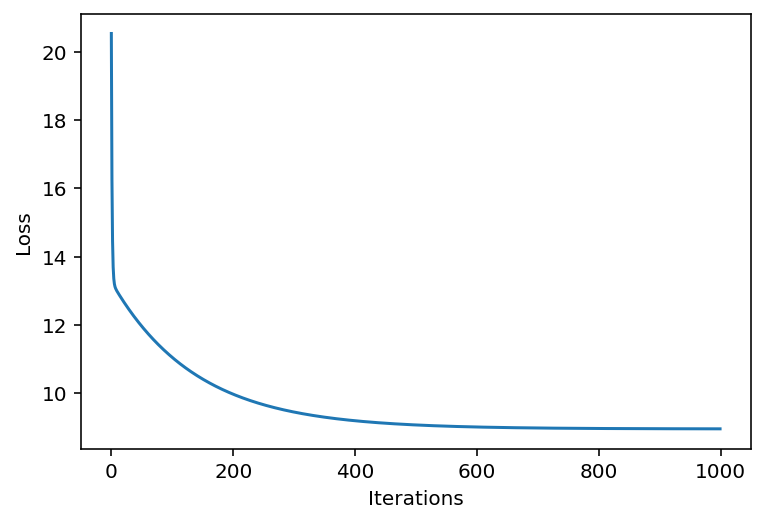

In [10]:
# gradient descent function definition
def grad_desc(X, y, w_init, tau, max_iter):

    L_iters = np.empty(max_iter)# record the loss values
    w_iters = np.empty([max_iter,2])# record the parameter values
    w = w_init # initialization
    
    for i in range(max_iter): # loop over the iterations
        
        y_pred = f_pred(X,w)# linear predicition function
        grad_f = grad_loss(y_pred,y,X)# gradient of the loss 
        w = w-tau*grad_f# update rule of gradient descent 
        L_iters[i] = loss_mse(y_pred,y)# save the current loss value 
        w_iters[i,:] = w.reshape(2)# save the current w value 
        
    return w, L_iters, w_iters


# run gradient descent algorithm 
start = time.time()
w_init = np.array([[1],[1]])
tau = 0.01
max_iter = 1000 

w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)

print('Time=',time.time() - start) # plot the computational cost
print( L_iters[max_iter-1]) # plot the last value of the loss
print( w) # plot the last value of the parameter w 


# plot
plt.figure(2)
plt.plot(L_iters) # plot the loss curve
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

## 7. Plot the linear prediction function
<hr>
$$
f_w(x) = w_0 + w_1 x
$$

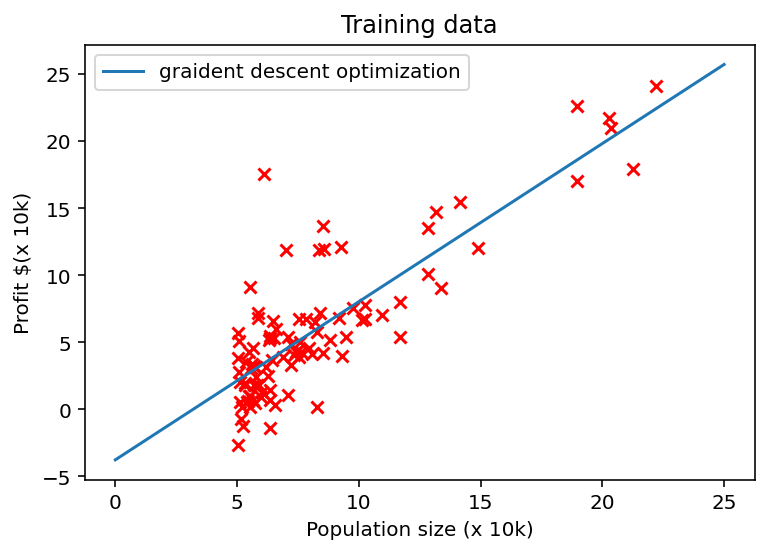

In [11]:
# linear regression model
x_pred = np.linspace(0,25,100) # define the domain of the prediction function
y_pred = w[0]+x_pred*w[1]# compute the prediction values within the given domain x_pred

# plot
plt.figure(3)
plt.scatter(x_train,y_train,c="r",marker="x")
plt.plot(x_pred, y_pred,label="graident descent optimization" )
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

## 8. Comparison with Scikit-learn linear regression algorithm
<hr>
### Compare with the Scikit-learn solution

Time= 0.020911216735839844
[[-3.89578088]
 [ 1.19303364]]
loss sklearn= 8.785041210245968
loss gradient descent= 8.957109868355534


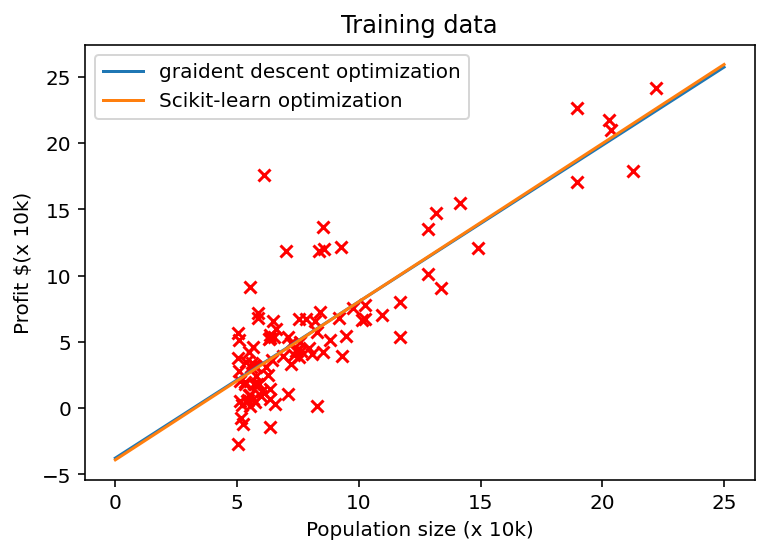

In [12]:
# run linear regression with scikit-learn
start = time.time()
lin_reg_sklearn = LinearRegression()
lin_reg_sklearn.fit(np.reshape(x_train,(-1,1)),np.reshape(y_train,(-1,1))) # learn the model parameters
print('Time=',time.time() - start)


# compute loss value
w_sklearn = np.zeros([2,1])
w_sklearn[0,0] = lin_reg_sklearn.intercept_
w_sklearn[1,0] = lin_reg_sklearn.coef_

print(w_sklearn)

loss_sklearn = loss_mse(np.reshape(lin_reg_sklearn.predict(np.reshape(y_train,(-1,1))),(-1,1)) ,np.reshape(y_train,(-1,1))) # compute the loss from the sklearn solution

print('loss sklearn=',loss_sklearn)
print('loss gradient descent=',L_iters[-1]) 


# plot
y_pred_sklearn = lin_reg_sklearn.predict(np.reshape(x_pred,(-1,1)))# prediction obtained by the sklearn library

plt.figure(3)

plt.scatter(x_train,y_train,c="r",marker="x")
plt.plot(x_pred, y_pred,label="graident descent optimization" )
plt.plot(x_pred,y_pred_sklearn,label="Scikit-learn optimization" )
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

## 9. Plot the loss surface, the contours of the loss and the gradient descent steps
<hr>

In [114]:
# plot gradient descent 
def plot_gradient_descent(X,y,w_init,tau,max_iter):
    
    def f_pred(X,w):
        
        f = f = np.matmul(X,w)
        
        return f
    
    def loss_mse(y_pred,y):
        
        temp=y_pred-y
        loss = np.matmul(temp.T,temp)/temp.size
    
        return loss.item()


    # gradient descent function definition
    def grad_desc(X, y, w_init, tau, max_iter):

        L_iters = np.empty(max_iter)# record the loss values
        w_iters = np.empty([max_iter,2])# record the parameter values
        w = w_init # initialization

        for i in range(max_iter): # loop over the iterations

            y_pred = f_pred(X,w)# linear predicition function
            grad_f = grad_loss(y_pred,y,X)# gradient of the loss 
            w = w-tau*grad_f# update rule of gradient descent 
            L_iters[i] = loss_mse(y_pred,y)# save the current loss value 
            w_iters[i,:] = w.reshape(2)# save the current w value 

        return w, L_iters, w_iters


    # run gradient descent
    w, L_iters, w_iters = grad_desc(X, y, w_init, tau, max_iter)
    
    # Create grid coordinates for plotting a range of L(w0,w1)-values
    B0 = np.linspace(-10, 10, 50)
    B1 = np.linspace(-1, 4, 50)
    
    xx, yy = np.meshgrid(B0, B1, indexing='xy')
    Z = np.zeros((B0.size,B1.size))  

    # Calculate loss values based on L(w0,w1)-values
    for (i,j),v in np.ndenumerate(Z):
        w_0=i*0.4-10
        w_1=j*0.1-1
        w_temp=np.array([[w_0],[w_1]])
        y_pred_temp=f_pred(X,w_temp)
        Z[i,j] = loss_mse(y_pred_temp,y )
        
    # 3D visualization
    fig = plt.figure(figsize=(15,6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122, projection='3d')

    # Left plot
    CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
    ax1.scatter(x=w_iters[0,0],y=w_iters[0,1],c="red")
    ax1.plot(w_iters[:,0],w_iters[:,1],c="blue")
    plt.plot
    # Right plot
    ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
    ax2.set_zlabel('Loss $L(w_0,w_1)$')
    ax2.set_zlim(Z.min(),Z.max())

    # plot gradient descent
    Z2 = np.zeros([max_iter])
    
    for i in range(max_iter):
        w0 = w_iters[i][0]
        w1 = w_iters[i][1]
        w_temp=np.array([[w0],[w1]])
        y_pred_temp = f_pred(X,w_temp)# linear predicition function
        Z2[i] = loss_mse(y_pred_temp,y)
        
    ax2.plot(w_iters[:,0],w_iters[:,1],Z2 )
    ax2.scatter(w_iters[0,0],w_iters[0,1],Z2[0] )

    # settings common to both plots
    for ax in fig.axes:
        ax.set_xlabel(r'$w_0$', fontsize=17)
        ax.set_ylabel(r'$w_1$', fontsize=17)
    

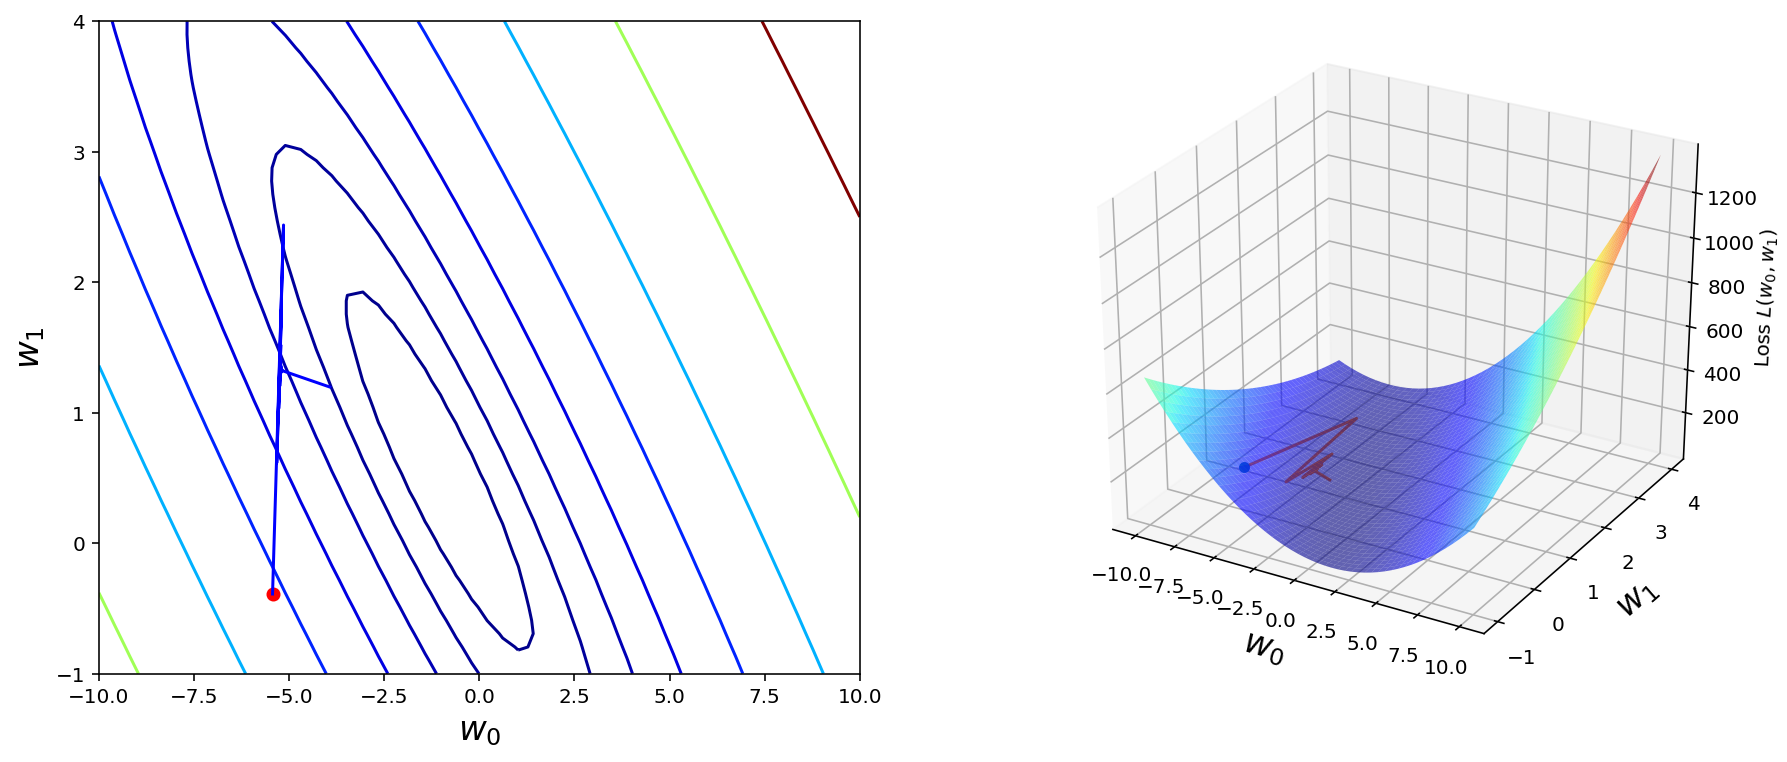

In [118]:
# run plot_gradient_descent function
w_init = np.array([[-5],[4]])
tau = 0.01
max_iter = 1000

plot_gradient_descent(X,y,w_init,tau,max_iter) 


# Output results

## 1. Plot the training data (1pt)

[]

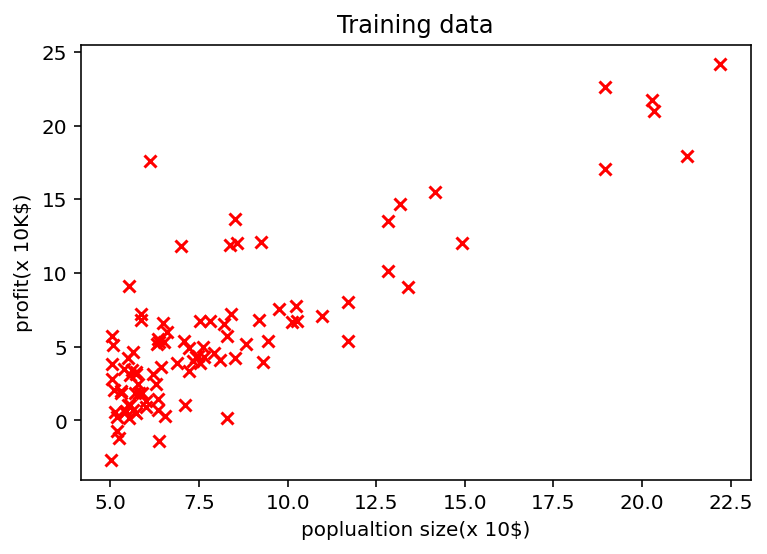

In [46]:

data = np.loadtxt('profit_population.txt', delimiter=',')
x_train = data[:,0]
y_train = data[:,1]

plt.scatter(x_train,y_train,c="r",marker="x")
plt.xlabel("poplualtion size(x 10$)")
plt.ylabel("profit(x 10K$)")
plt.title("Training data")
plt.plot()

## 2. Plot the loss curve in the course of gradient descent (2pt)

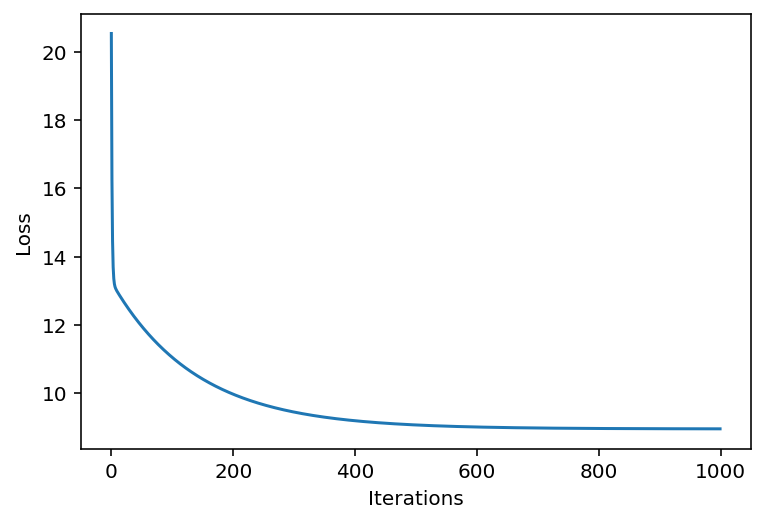

In [120]:
# plot
plt.figure(2)
plt.plot(L_iters) # plot the loss curve
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

## 3. Plot the prediction function superimposed on the training data (2pt)

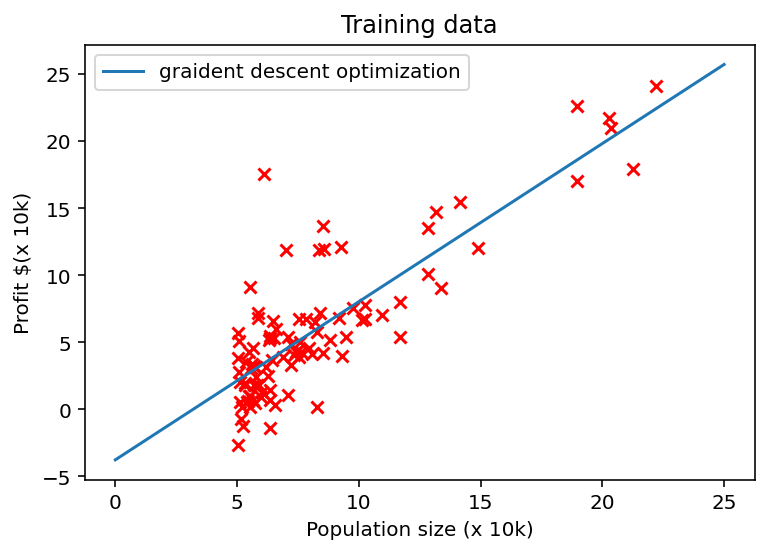

In [122]:
x_pred = np.linspace(0,25,100)
y_pred = w[0]+x_pred*w[1]

plt.figure(3)
plt.scatter(x_train,y_train,c="r",marker="x")
plt.plot(x_pred, y_pred,label="graident descent optimization" )
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

## 4. Plot the prediction functions obtained by both the Scikit-learn linear regression solution and the gradient descent superimposed on the training data (2pt)

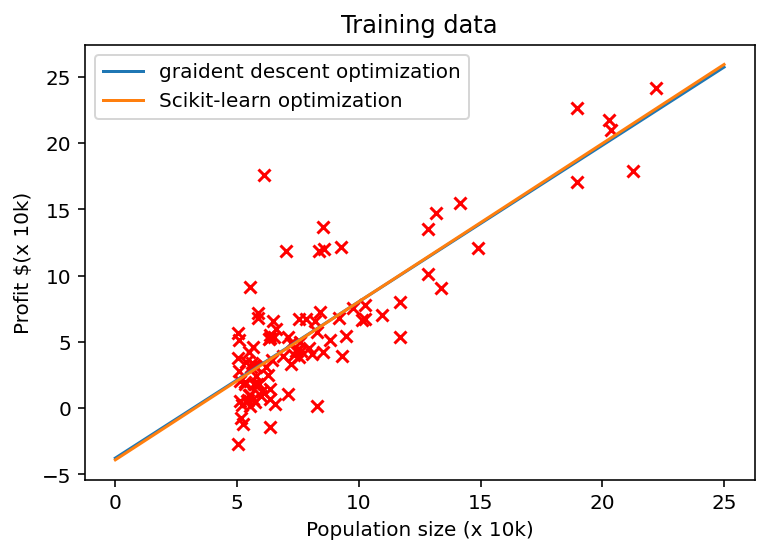

In [123]:
lin_reg_sklearn = LinearRegression()
lin_reg_sklearn.fit(np.reshape(x_train,(-1,1)),np.reshape(y_train,(-1,1))) # learn the model parameters

w_sklearn = np.zeros([2,1])
w_sklearn[0,0] = lin_reg_sklearn.intercept_
w_sklearn[1,0] = lin_reg_sklearn.coef_

loss_sklearn = loss_mse(np.reshape(lin_reg_sklearn.predict(np.reshape(y_train,(-1,1))),(-1,1)) ,np.reshape(y_train,(-1,1))) # compute the loss from the sklearn solution

y_pred_sklearn = lin_reg_sklearn.predict(np.reshape(x_pred,(-1,1)))# prediction obtained by the sklearn library

plt.figure(3)

plt.scatter(x_train,y_train,c="r",marker="x")
plt.plot(x_pred, y_pred,label="graident descent optimization" )
plt.plot(x_pred,y_pred_sklearn,label="Scikit-learn optimization" )
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

## 5. Plot the loss surface (right) and the path of the gradient descent (2pt)

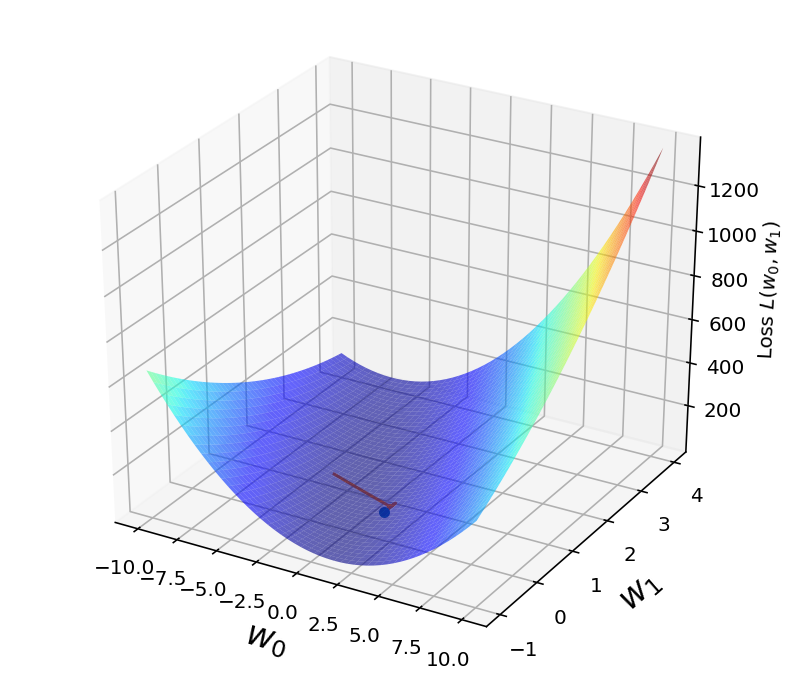

In [130]:
w, L_iters, w_iters = grad_desc(X, y, w_init, tau, max_iter)

B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)

xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))  

for (i,j),v in np.ndenumerate(Z):
    w_0=i*0.4-10
    w_1=j*0.1-1
    w_temp=np.array([[w_0],[w_1]])
    y_pred_temp=f_pred(X,w_temp)
    Z[i,j] = loss_mse(y_pred_temp,y )

fig = plt.figure(figsize=(15,6))
ax2 = fig.add_subplot(122, projection='3d')

plt.plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Loss $L(w_0,w_1)$')
ax2.set_zlim(Z.min(),Z.max())


Z2 = np.zeros([max_iter])

for i in range(max_iter):
    w0 = w_iters[i][0]
    w1 = w_iters[i][1]
    w_temp=np.array([[w0],[w1]])
    y_pred_temp = f_pred(X,w_temp)# linear predicition function
    Z2[i] = loss_mse(y_pred_temp,y)

ax2.plot(w_iters[:,0],w_iters[:,1],Z2 )
ax2.scatter(w_iters[0,0],w_iters[0,1],Z2[0] )

for ax in fig.axes:
    ax.set_xlabel(r'$w_0$', fontsize=17)
    ax.set_ylabel(r'$w_1$', fontsize=17)

## 6. Plot the contour of the loss surface (left) and the path of the gradient descent (2pt)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

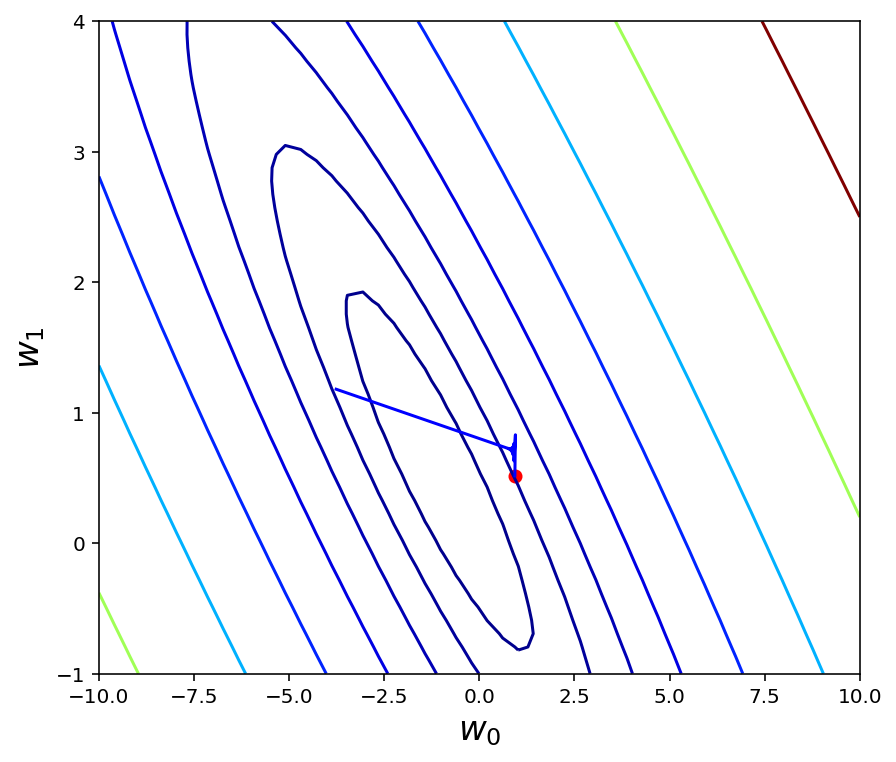

In [137]:
w, L_iters, w_iters = grad_desc(X, y, w_init, tau, max_iter)

B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)

xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))  

for (i,j),v in np.ndenumerate(Z):
    w_0=i*0.4-10
    w_1=j*0.1-1
    w_temp=np.array([[w_0],[w_1]])
    y_pred_temp=f_pred(X,w_temp)
    Z[i,j] = loss_mse(y_pred_temp,y )

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)

CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(x=w_iters[0,0],y=w_iters[0,1],c="red")
ax1.plot(w_iters[:,0],w_iters[:,1],c="blue")


ax1.set_xlabel(r'$w_0$', fontsize=17)
ax1.set_ylabel(r'$w_1$', fontsize=17)
    
plt.plot

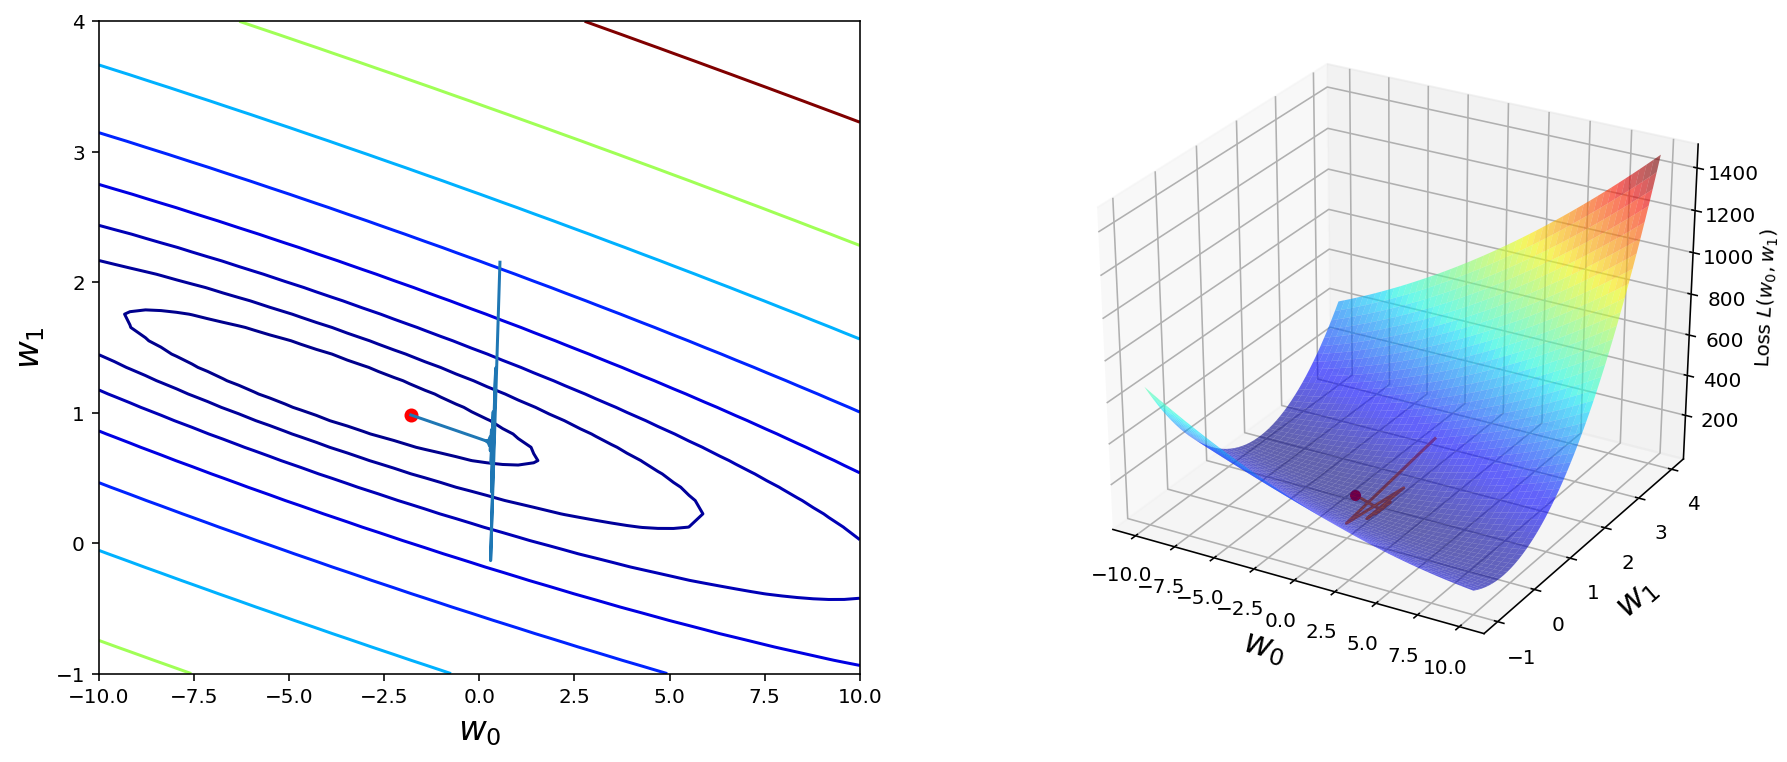